In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_265"; OpenJDK Runtime Environment (build 1.8.0_265-8u265-b01-0ubuntu2~18.04-b01); OpenJDK 64-Bit Server VM (build 25.265-b01, mixed mode)
  Starting server from /opt/conda/envs/h2o/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjsdw2y1k
  JVM stdout: /tmp/tmpjsdw2y1k/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjsdw2y1k/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.1
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_o7b1pd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,13.98 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
path = 'https://s3-us-west-2.amazonaws.com/h2o-tutorials/data/topics/nlp/amazon_reviews/AmazonReviews.csv'

In [4]:
reviews = h2o.import_file(path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
reviews.dim

[100000, 10]

In [6]:
reviews.head()

ProductId,UserId,Summary,Score,HelpfulnessDenominator,Id,ProfileName,HelpfulnessNumerator,Time,Text
B00141QYSQ,A1YS02UZZGRDCT,Do Not Buy,1,2,41471,Evan Eberhardt,2,1.34836e+09,"These are made in China (do not buy ANY pet food from China). Dogswell has been using propylene glycol to soften their treats (what are they thinkng?). Do not purchase or support this company in any way until they clean up their act. And for whatever reason Amazon doesn't allow returns of this item, so I had to toss mine out. Bad business all around on this one."
B0089SPEO2,A3JOYNYL458QHP,Less lemon and less zing,3,0,28582,coleridge,0,1.32391e+09,"Everything is ok, except it just isn't as good as it is in the bags. Just considerably more bland -- less lemon and less zing. Boring."
B001PMCDK2,A14TTMM0Z03Y2W,my cat goes crazy for these!,5,0,389965,Lindsay S. Bradford,0,1.3106e+09,"Best cat treat ever. There isn't anything comparable to the love my cat has for these treats, he snubs away any other kind now.<br />I know he likes to manipulate me with his cattiness but these treats are my way of manipulating him to come sit on my lap and have some chill time. :)"
B002Q8JOSI,A17UQD2RSSQH5X,My dogs tell me these treats are YUMMY,5,1,212536,in the dark,1,1.31613e+09,"My two Corgis were thoroughly spoiled by my late husband (I spent a year and a half dieting them down a combined total of 25 pounds!)<br /><br />They are accustomed to the finest of fare, and they absolutely love the Wellness brand of treats."
B00176G870,A2F2MZW8EOGH5J,Yummy to the tummy,5,0,115971,"daemoncycler ""When you arrive at a fork in th...",0,1.33479e+09,We used to have drive down to the specialty pet food store for this product. So glad we discovered Amazon. As far as I can tell it is no more expensive & in some cases less - Prime membership is awesome. Loving Pets treats are some of the best according to my dog. They do not develop that nasty smell like some dog treats do.
B001CHFUGY,A2M8VROSDPU4JT,Very good coffee,5,1,434484,"Officefan ""Officefankt""",1,1.27725e+09,"I really liked this coffee, it was just as good as everyone claimed it was. Strong, bold and flavorful! I would recommend!"
B0041CIR62,A16I6WJUEBJ1C3,okay but not as healthy as it appears,2,1,138997,"doctorsirena ""doctorsirena""",1,1.34369e+09,"I am always looking for healthier, whole grain versions of foods I enjoy. Unfortunately, these Peacock brand noodles are yet another food masquerading as healthy. The product title in big letters on the front says ""Brown Rice Vermicelli"", making the consumer think ""this is made with brown rice, so it should be a healthy choice"". But the first indication that it is not is when looking at the fiber content on the nutrition facts - only 0.6g per 2oz serving. Then onto the ingredients list to see why so low... contains brown rice, sago starch and water. The sago starch comes from palms and must not have much (if any) fiber.<br /><br />The Annie Chun's Maifun Brown Rice Noodles (sold on Amazon and in my local healthy grocer) has become one of my staples and is my frame of reference when comparing to the Peacock brand. The Annie Chun's product is made with 100% whole grain, with ingredients brown rice flour and water. Per 2oz serving, it has 4g fiber and pretty much the same calories and other nutrients as the Peacock brand.<br /><br />If you do try this Peacock brand noodles and have not used rice noodles before, you will need to seek guidance elsewhere on preparation. As others have pointed out, the Peacock package gives almost no directions on how to prepare the product, aside from a brief mention in the recipes (in the header text it does say that they are ""easy-to-cook"" but does not say how). It also contains a very strange recipe for rice noodles: Aglio Olio style - this is an Italian recipe for noodles with olive oil/garlic/sprinkled with grated cheese that I think would not be very tasty. The second recipe appears to be for a soup with veggie strips. Neither recipe gives amo

In [7]:
reviews["Score"].table()

Score,Count
1,9204
2,5180
3,7407
4,14221
5,63988


In [8]:

summary_freq = reviews["Summary"].table()
summary_freq = summary_freq.sort("Count", ascending = [False])
summary_freq.head()

Summary,Count
Delicious,426
Delicious!,417
Yummy!,284
Yummy,222
Great product,204
Yum!,193
Excellent,183
Great Product,155
Love it!,154
Great,138


In [9]:
#' Add Target Column: "PositiveReview"
reviews["PositiveReview"] = (reviews["Score"] >= 4).ifelse("1", "0")

In [10]:
reviews.head(2
            )

ProductId,UserId,Summary,Score,HelpfulnessDenominator,Id,ProfileName,HelpfulnessNumerator,Time,Text,PositiveReview
B00141QYSQ,A1YS02UZZGRDCT,Do Not Buy,1,2,41471,Evan Eberhardt,2,1.34836e+09,"These are made in China (do not buy ANY pet food from China). Dogswell has been using propylene glycol to soften their treats (what are they thinkng?). Do not purchase or support this company in any way until they clean up their act. And for whatever reason Amazon doesn't allow returns of this item, so I had to toss mine out. Bad business all around on this one.",0
B0089SPEO2,A3JOYNYL458QHP,Less lemon and less zing,3,0,28582,coleridge,0,1.32391e+09,"Everything is ok, except it just isn't as good as it is in the bags. Just considerably more bland -- less lemon and less zing. Boring.",0


In [11]:
reviews["PositiveReview"].table()

PositiveReview,Count
0,21791
1,78209


In [12]:
STOP_WORDS = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what",
               "there","all","we","one","the","a","an","of","or","in","for","by","on",
               "but","is","in","a","not","with","as","was","if","they","are","this","and","it","have",
               "from","at","my","be","by","not","that","to","from","com","org","like","likes","so"]

In [13]:
def tokenize(sentences, stop_word = STOP_WORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(STOP_WORDS)),:]
    return tokenized_words

In [14]:
# Break reviews into sequence of words
words = tokenize(reviews["Text"])

In [15]:
words.head()

C1
these
made
china
do
buy
any
pet
food
china
dogswell


In [16]:
# Train Word2Vec Model for vec size = 2
from h2o.estimators.word2vec import H2OWord2vecEstimator

w2v_len2_model = H2OWord2vecEstimator(vec_size = 2, model_id = "w2v_len2.hex")
w2v_len2_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [18]:
sample_embeddings = words.head()

In [17]:
sample_embeddings = words.head()
sample_embeddings.col_names = ["Word"]
sample_embeddings = sample_embeddings.cbind(w2v_len2_model.transform(sample_embeddings, aggregate_method="None"))

sample_embeddings

Word,C1,C2
these,0.685328,-0.241992
made,0.652111,-0.0117036
china,0.613464,-0.562936
do,0.667735,-0.198394
buy,0.679803,-0.309637
any,0.696138,-0.132108
pet,0.614178,-0.892285
food,0.582473,-0.691752
china,0.613464,-0.562936
dogswell,0.572905,-0.478309


In [19]:
word_embeddings = w2v_len2_model.to_frame()
word_embeddings.head()

Word,V1,V2
kronung,0.49012,0.439802
berge,0.17741,0.040173
ewww,0.655863,-0.307839
maison,0.457277,0.622207
mattered,0.716068,-0.416523
helpings,0.491668,-0.130603
twitter,0.68271,-0.141185
aah,0.734434,-0.165313
reverted,0.635951,-0.420142
mroe,0.880976,-0.260723


In [20]:
word_embeddings.dim

[19180, 3]

In [21]:
# Filter Word Embeddings to selected words

selected_words = ["coffee", "espresso", "starbucks", "sweet", "salty", "savory", "email", "support", "answered", 
                  "unhappy", "waited", "returned", "tasty", "yummy", "moldy", "expired", "salmonella", "best", 
                  "amazing", "abdominal", "folic", "zinc"]

filtered_embeddings = word_embeddings[word_embeddings["Word"].isin(selected_words)]
plot_data = filtered_embeddings.as_data_frame(use_pandas = True)

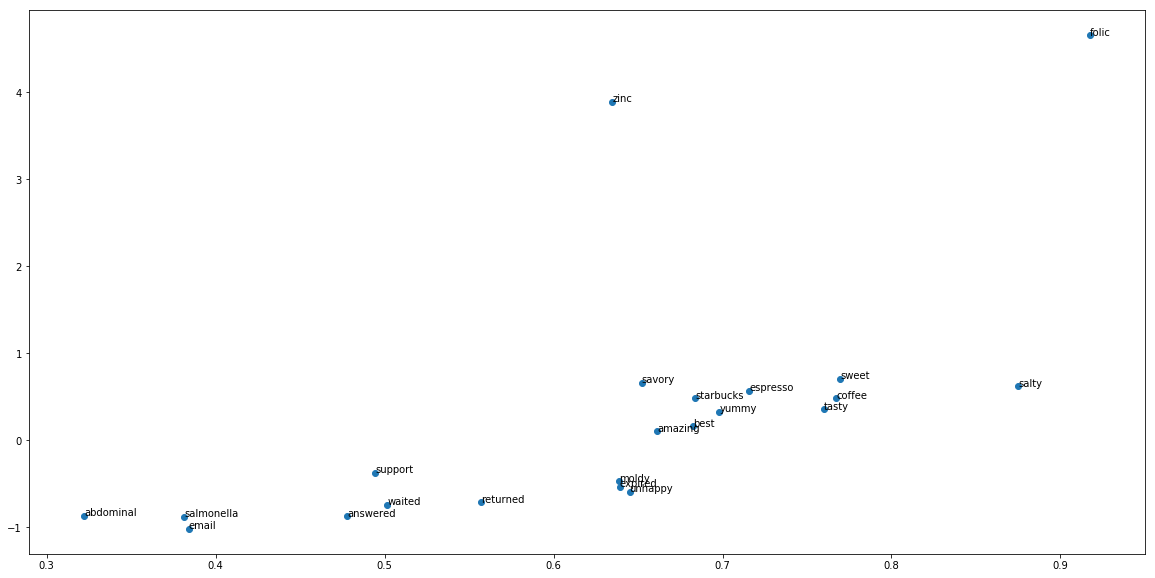

In [22]:
# Plot Word Embeddings
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(plot_data["V1"], plot_data["V2"])

for i, txt in enumerate(plot_data["Word"]):
    ax.annotate(txt, (plot_data["V1"].iloc[i], plot_data["V2"].iloc[i]))

In [23]:
# Train Word2Vec Model for vec size = 100
w2v_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v.hex")
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [24]:
# Sanity check - find synonyms for the word 'coffee'
w2v_model.find_synonyms("coffee", count = 5)

OrderedDict([('coffe', 0.82940673828125),
             ('espresso', 0.7913356423377991),
             ('coffees', 0.7650356888771057),
             ('expresso', 0.751103937625885),
             ('cofee', 0.7414178252220154)])

In [25]:
# Sanity check - find synonyms for the word 'stale'
w2v_model.find_synonyms("stale", count = 5)

OrderedDict([('moldy', 0.7483037114143372),
             ('rancid', 0.7062056660652161),
             ('inedible', 0.6947444677352905),
             ('unedible', 0.6707872152328491),
             ('mealy', 0.6430482268333435)])

In [26]:
word_embeddings = w2v_model.to_frame()
word_embeddings.head()

Word,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
kronung,-0.0792528,-0.0370757,-0.0586272,0.0939821,-0.181839,-0.017946,0.0120699,-0.17256,-0.266287,-0.024207,0.0374386,0.0670545,-0.245215,0.0162346,0.0588064,-0.148941,0.164106,0.0524249,0.240298,-0.0440404,-0.0477422,-0.0350006,-0.256759,-0.0156323,0.00570741,-0.194637,-0.0671118,-0.192517,0.105447,0.00156338,-0.0835058,0.267269,-0.0278297,-0.025915,0.123187,-0.229378,-0.126726,-0.163668,-0.178696,0.0293393,0.151317,-0.186325,-0.0936187,0.20012,0.0758513,-0.0987916,-0.0290874,0.0296526,0.112373,-0.0943505,0.147155,-0.0955885,-0.0817541,-0.0350407,0.0364105,0.000542214,-0.0691402,0.253191,0.151188,0.313655,-0.186834,-0.104668,-0.278715,-0.23644,-0.0585983,0.0220837,-0.047496,0.0252091,-0.177058,0.108058,-0.101604,0.118264,-0.0945384,0.0252731,0.0601711,-0.073019,-0.0370719,0.190243,-0.0106563,0.200225,-0.00612189,-0.0611352,-0.13213,-0.0689996,-0.0989263,0.0261873,-0.0326921,0.0710557,-0.178257,-0.0174128,0.206543,-0.290108,-0.0619036,-0.0514058,-0.0403146,0.015031,0.169185,0.1537,-0.188319,-0.0233891
berge,-0.0411517,0.0515228,0.0259242,-0.224889,-0.343399,0.136873,-0.119975,-0.135492,0.0882545,-0.271753,-0.0699823,-0.0841226,-0.109784,0.190063,-0.035238,-0.00548094,0.0965036,-0.143481,0.0923574,-0.0901066,-0.0230048,-0.091476,-0.142829,-0.195187,0.0489124,-0.267043,0.124465,-0.237728,0.118568,-0.0442787,-0.0988112,0.0397322,0.0822322,-0.0619197,-0.162401,-0.189245,0.222569,-0.0410941,0.156199,0.0127588,-0.255564,-0.0471165,-0.0275247,0.13069,-0.0910257,0.10914,-0.113769,-0.0384861,0.0340268,0.0660728,0.0157197,-0.100675,-0.123533,-0.223497,0.350568,0.112524,0.0652024,-0.0182273,0.0495576,0.124176,-0.0852473,-0.102837,-0.210311,0.0106309,0.168859,0.0570995,-0.0798146,0.109205,-0.107475,0.0712606,-0.0120889,0.103008,-0.149133,0.172761,0.106453,0.0317233,0.0712124,0.0418931,0.19248,-0.108861,0.162012,0.101949,-0.0768699,-0.130121,-0.0760271,-0.160624,-0.0568905,0.166684,0.00566489,0.120513,0.0764674,-0.325192,0.0202238,-0.222704,-0.116827,-0.153573,0.239026,-0.298891,-0.100764,0.00597683
ewww,0.203569,0.0219563,0.157836,-0.0382243,-0.0556094,-0.0301353,0.20077,-0.207374,-0.227362,-0.150675,-0.0362023,-0.145955,0.140533,-0.0241996,-0.0314616,-0.0566943,0.101031,0.062978,0.137753,-0.0085688,-0.00021823,0.0570398,0.0522412,-0.0919529,-0.00430461,-0.138241,-0.0582671,-0.0465493,0.0477693,-0.0823059,-0.07848,0.262936,-0.35026,-0.126651,0.0072032,-0.157406,0.0625988,-0.142986,-0.225963,-0.0900258,-0.113117,-0.108915,0.0936273,-0.0570692,0.101127,-0.0273744,-0.120672,-0.00124344,-0.0449032,-0.120647,-0.030369,0.0820543,0.0464153,-0.0996215,0.00263844,0.0214956,0.0286003,0.0198099,0.0350037,0.101076,-0.0315106,0.00863533,-0.21503,-0.135785,-0.0429184,0.156916,-0.122713,0.212133,-0.0120839,0.0819865,-0.131254,0.00651489,0.0987493,0.0657174,-0.175248,0.136525,-0.0133887,0.161084,0.269677,0.0530474,-0.081077,-0.109626,-0.144367,0.110165,-0.0264184,0.108578,0.103107,-0.0210179,0.107154,0.155977,0.0866213,0.085634,-0.0460668,0.181092,0.0368693,-0.0346971,0.214552,-0.280042,-0.0939152,-0.0438017
maison,-0.319128,-0.0114482,0.190619,-0.084491,-0.0241784,0.191,0.120603,-0.145145,-0.184897,0.0206803,-0.103528,0.192345,-0.250317,-0.174728,0.200112,-0.104637,0.130006,-0.0459733,0.0634428,0.182844,-0.0854511,-0.0378358,-0.120797,0.193947,-0.122451,-0.121392,0.199702,-0.248923,0.118977,-0.240042,-0.128626,0.184559,-0.37119,-0.00395339,-0.0644138,-0.49397,-0.327342,0.0770964,-0.202071,-0.0271609,-0.0208958,-0.162848,-0.19414,0.183419,0.226486,0.376958,-0.165728,0.116566,-0.272612,0.0566361,0.0982677,-0.0701917,-0.365467,0.0525233,0.114851,0.019788,-0.11057,-

In [27]:
from h2o.estimators import H2OKMeansEstimator

kmeans = H2OKMeansEstimator(model_id = "word_segments.hex",
                            estimate_k = True, k = 100, # Max number of clusters
                            seed = 1234)

x = list(set(word_embeddings.col_names) - set(["Word"]))
kmeans.train(x = x, training_frame = word_embeddings)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [28]:
# Clusters
kmeans.centroid_stats()


Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,10072.0,915282.874776
1,,2.0,9108.0,945209.390493


In [29]:

word_clusters = word_embeddings.cbind(kmeans.predict(word_embeddings))
word_clusters[["Word", "predict"]].head()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


Word,predict
kronung,1
berge,0
ewww,0
maison,1
mattered,0
helpings,0
twitter,0
aah,1
reverted,0
mroe,0


In [30]:
selected_clusters = word_clusters[word_clusters["Word"].isin(selected_words)]

In [31]:

print("Cluster 0")
print(selected_clusters[selected_clusters["predict"] == 0, "Word"])

Cluster 0


Word
abdominal
answered
salmonella
unhappy
waited
expired
support
email
returned


In [32]:

print("Cluster 1")
print(selected_clusters[selected_clusters["predict"] == 1, "Word"])

Cluster 1


Word
folic
moldy
zinc
savory
espresso
yummy
salty
starbucks
amazing
tasty


In [33]:

# Find the 80th quantile of time in the dataset
time_split = reviews["Time"].quantile(prob = [0.8])[1]
reviews["Train"] = (reviews["Time"] < time_split).ifelse("Yes", "No")

In [34]:
train = reviews[reviews["Train"] == "Yes"]
test = reviews[reviews["Train"] == "No"]

In [35]:

from h2o.estimators import H2OGradientBoostingEstimator

predictors = ['ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']
response = 'PositiveReview'

gbm_baseline = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                            stopping_rounds = 5, score_tree_interval = 10,
                                            model_id = "gbm_baseline.hex"
                                           )
gbm_baseline.train(x = predictors, y = response, 
                   training_frame = train, validation_frame = test
                  )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [36]:
print("AUC on Validation Data: " + str(round(gbm_baseline.auc(valid = True), 3)))

AUC on Validation Data: 0.616


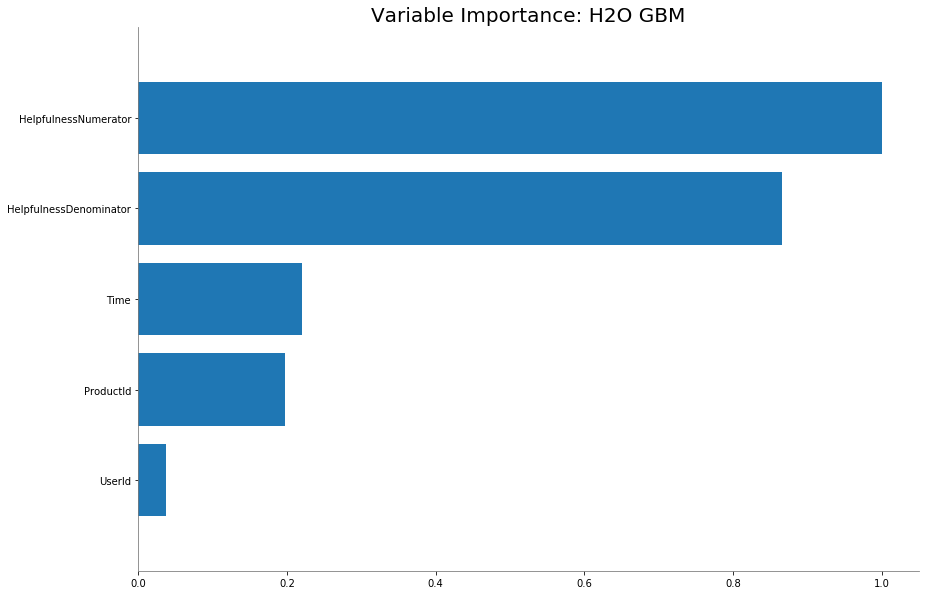

In [37]:
gbm_baseline.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


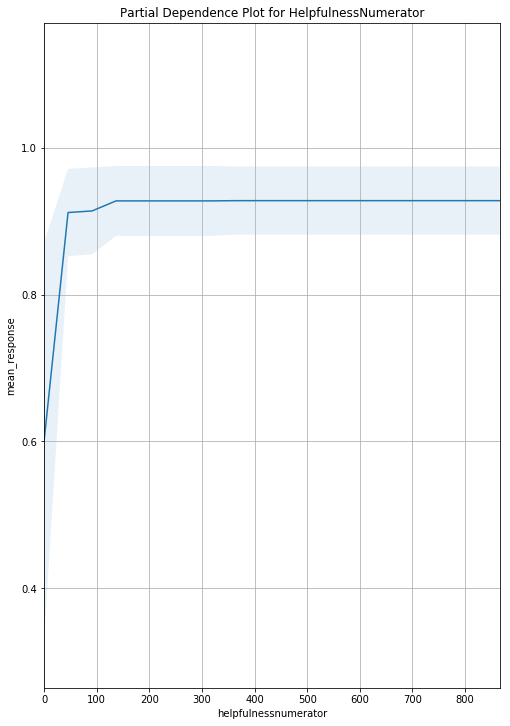

In [38]:
%matplotlib inline  
pdp_helpfulness = gbm_baseline.partial_plot(train, cols = ["HelpfulnessNumerator"])

In [39]:

# Calculate a vector for each review
review_vecs = w2v_model.transform(words, aggregate_method = "AVERAGE")

In [41]:
review_vecs.dim

[100000, 100]

In [42]:
# Add aggregated word embeddings 
ext_reviews = reviews.cbind(review_vecs)

In [43]:

ext_train = ext_reviews[ext_reviews["Train"] == "Yes"]
ext_test = ext_reviews[ext_reviews["Train"] == "No"]

In [44]:
ext_reviews

ProductId,UserId,Summary,Score,HelpfulnessDenominator,Id,ProfileName,HelpfulnessNumerator,Time,Text,PositiveReview,Train,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
B00141QYSQ,A1YS02UZZGRDCT,Do Not Buy,1,2,41471,Evan Eberhardt,2,1.34836e+09,"These are made in China (do not buy ANY pet food from China). Dogswell has been using propylene glycol to soften their treats (what are they thinkng?). Do not purchase or support this company in any way until they clean up their act. And for whatever reason Amazon doesn't allow returns of this item, so I had to toss mine out. Bad business all around on this one.",0,No,-0.0507862,0.0992074,0.0644051,0.0214196,-0.112662,0.0026172,0.192161,0.0895233,0.00646357,-0.035376,-0.0516631,-0.228713,0.0601476,-0.125042,-0.084773,-0.0071983,0.0627074,0.0497451,0.147315,0.0405302,0.0608478,-0.0692863,-0.046488,-0.142201,-0.0790925,-0.0360021,0.00365776,-0.100631,0.00885379,-0.120983,-0.0091603,0.00459516,-0.144966,-0.147531,-0.0600872,-0.271691,0.126518,-0.135424,0.0362847,-0.0797444,-0.0365968,-0.119102,0.0476854,-0.0382497,0.0826772,0.0104814,-0.135693,0.00792311,-0.0269636,-0.164534,0.015703,0.0475726,0.121391,0.102088,0.139977,0.0458473,0.0540362,0.193532,0.149617,0.0382807,-0.183832,-0.0119407,-0.195692,0.0258788,0.00581044,0.0247473,-0.0116567,0.0995764,-0.093886,0.0495323,-0.0601084,-0.031108,0.135481,0.0865724,-0.0769606,0.104303,0.0933626,0.161136,-0.015312,-0.00222782,-0.0494968,-0.035736,-0.021613,0.177917,-0.0142408,-0.0302524,-0.0387564,0.0248016,0.0846836,0.186271,0.0164554,0.0604741,0.0624894,0.101542,0.0662559,-0.0228931,0.0439158,-0.125624,-0.0421572,0.0303357
B0089SPEO2,A3JOYNYL458QHP,Less lemon and less zing,3,0,28582,coleridge,0,1.32391e+09,"Everything is ok, except it just isn't as good as it is in the bags. Just considerably more bland -- less lemon and less zing. Boring.",0,Yes,-0.222229,0.0310405,0.180526,-0.0347527,0.0920276,-0.0203132,0.223596,0.0542921,-0.10597,-0.0863542,-0.112195,0.104252,-0.165481,-0.0744784,0.0563715,0.0183045,0.0481884,0.0662841,0.0242493,-0.103936,-0.0162777,0.086522,-0.0171848,-0.0646601,-0.0468325,-0.0362707,0.071122,0.0204015,0.0410724,-0.223964,0.084814,0.031527,-0.232549,-0.0437342,0.0929041,-0.124336,0.0184082,-0.102974,-0.0136971,0.0244193,0.0843055,-0.1808,0.0671199,-0.0910117,0.0611531,-0.0235994,-0.000601388,0.0525295,-0.0242246,-0.131298,0.0809093,-0.057373,0.206248,0.128251,-0.0264868,0.00405604,-0.174833,0.0972237,0.0785321,0.0782173,-0.0532983,-0.0108917,-0.0942679,0.00133038,-0.128101,-0.0787584,-0.00164588,0.108182,-0.0871777,0.0135486,-0.240951,-0.0332373,0.159323,0.0332588,-0.0251307,0.0813865,-0.0560711,0.178509,0.0399066,0.0905535,-0.0850187,0.0249556,-0.156318,0.134754,0.0699051,0.179331,0.055799,-0.0951655,0.00183206,0.186656,0.0264459,0.12358,0.010444,0.0457345,0.131928,0.0328116,0.113283,-0.0803062,-0.115347,-0.08779
B001PMCDK2,A14TTMM0Z03Y2W,my cat goes crazy for these!,5,0,389965,Lindsay S. Bradford,0,1.3106e+09,"Best cat treat ever. There isn't anything comparable to the love my cat has for these treats, he snubs away any other kind now.<br />I know he likes to manipulate me with his cattiness but these treats are my way of manipulating him to come sit on my lap and have some chill time. :)",1,Yes,-0.0165855,0.124047,0.0903657,0.0701157,-0.132572,-0.0776742,0.16985,0.0945349,0.00116068,-0.154263,0.00596363,-0.0260785,0.00834524,-0.103445,0.0249006,0.116026,0.0779707,0.0778262,0.158386,0.0912067,-0.09043,0.0766506,0.0369978,-0.125728,-0.077454,0.0245498,0.0400932,0.0633632,-0.00423568,-0.109498,0.0141848,0.0516431,-0.147152,-0.0881512,0.0755724,-0.293318,0.13481,-0.154901,0.0323371,-0.08

In [45]:
predictors = predictors + review_vecs.names
response = 'PositiveReview'

gbm_embeddings = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10,
                                              model_id = "gbm_embeddings.hex", ntrees = 1000,
                                             )
gbm_embeddings.train(x = predictors, y = response, 
                   training_frame = ext_train, validation_frame = ext_test
                  )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
print("Baseline AUC: " + str(round(gbm_baseline.auc(valid = True), 3)))
print("With Embeddings AUC: " + str(round(gbm_embeddings.auc(valid = True), 3)))

Baseline AUC: 0.616
With Embeddings AUC: 0.901


In [47]:
gbm_embeddings.confusion_matrix(valid = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5520543212750034: 


,,0,1,Error,Rate
0,0,2686.0,1974.0,0.4236,(1974.0/4660.0)
1,1,791.0,14557.0,0.0515,(791.0/15348.0)
2,Total,3477.0,16531.0,0.1382,(2765.0/20008.0)


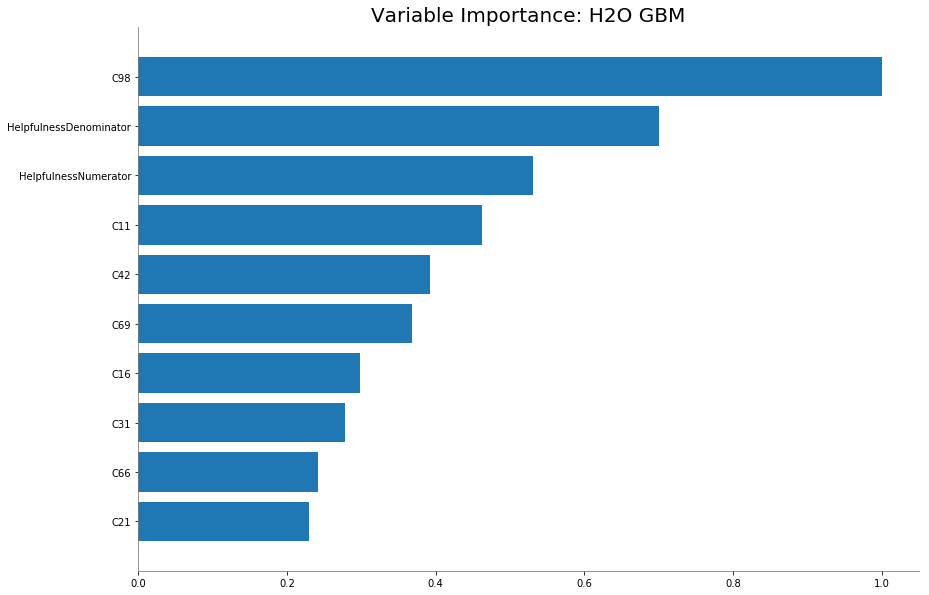

In [48]:
gbm_embeddings.varimp_plot()

In [49]:
top_w2v_features = list(filter(lambda x: x.startswith('C'), map(lambda x: x[0], gbm_embeddings.varimp())))[1:10]
top_w2v_features

['C11', 'C42', 'C69', 'C16', 'C31', 'C66', 'C21', 'C96', 'C92']

In [50]:
from h2o.estimators import H2OGeneralizedLinearEstimator

glm_predictors = ["HelpfulnessNumerator", "HelpfulnessDenominator"] + review_vecs.names

glm_embeddings = H2OGeneralizedLinearEstimator(model_id = "glm_embeddings.hex", interactions = top_w2v_features,
                                               family = "binomial"
                                              )
glm_embeddings.train(x = glm_predictors, y = response,
                     training_frame = ext_train, validation_frame = ext_test
                    )

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [51]:
print("Baseline AUC: " + str(round(gbm_baseline.auc(valid = True), 3)))
print("With Embeddings AUC (GBM): " + str(round(gbm_embeddings.auc(valid = True), 3)))
print("With Embeddings AUC (GLM): " + str(round(glm_embeddings.auc(valid = True), 3)))

Baseline AUC: 0.616
With Embeddings AUC (GBM): 0.901
With Embeddings AUC (GLM): 0.904


In [52]:
glm_embeddings.confusion_matrix(valid = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.590495953565412: 


,,0,1,Error,Rate
0,0,2930.0,1730.0,0.3712,(1730.0/4660.0)
1,1,1011.0,14337.0,0.0659,(1011.0/15348.0)
2,Total,3941.0,16067.0,0.137,(2741.0/20008.0)


In [53]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(project_name = "positive_reviews", max_runtime_secs = 180, 
                   keep_cross_validation_models = False, keep_cross_validation_predictions = False,
                   nfolds = 3, exclude_algos = ["DRF"], seed = 1234)
automl.train(x = predictors, y = response, training_frame = ext_train, leaderboard_frame = ext_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [54]:
automl.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201114_094121,0.887936,0.352605,0.96044,0.27641,0.332435,0.110513
StackedEnsemble_AllModels_AutoML_20201114_094121,0.887538,0.352784,0.96028,0.270624,0.332636,0.110647
GLM_1_AutoML_20201114_094121,0.885292,0.405601,0.959486,0.279553,0.357434,0.127759
DeepLearning_1_AutoML_20201114_094121,0.878441,0.357307,0.955607,0.281934,0.334859,0.11213
XGBoost_grid__1_AutoML_20201114_094121_model_1,0.86549,0.379868,0.95122,0.29432,0.346673,0.120182
GBM_grid__1_AutoML_20201114_094121_model_1,0.856853,0.410226,0.947216,0.321032,0.360452,0.129926
GBM_2_AutoML_20201114_094121,0.848879,0.439178,0.945362,0.329805,0.374851,0.140513
GBM_3_AutoML_20201114_094121,0.846344,0.449174,0.94346,0.31967,0.379538,0.144049
GBM_5_AutoML_20201114_094121,0.843692,0.462013,0.942597,0.331371,0.386058,0.149041
GBM_1_AutoML_20201114_094121,0.842699,0.446747,0.942246,0.317257,0.378775,0.14347


In [55]:
h2o.cluster().shutdown()

H2O session _sid_95d3 closed.
